### Score: `[31]`

Q1. `[11]` good job。

Q2. `[20]` please use different project

# Assignment#4 ZHAO Dongwei SID:12432909

## 1. Global Earthquakes

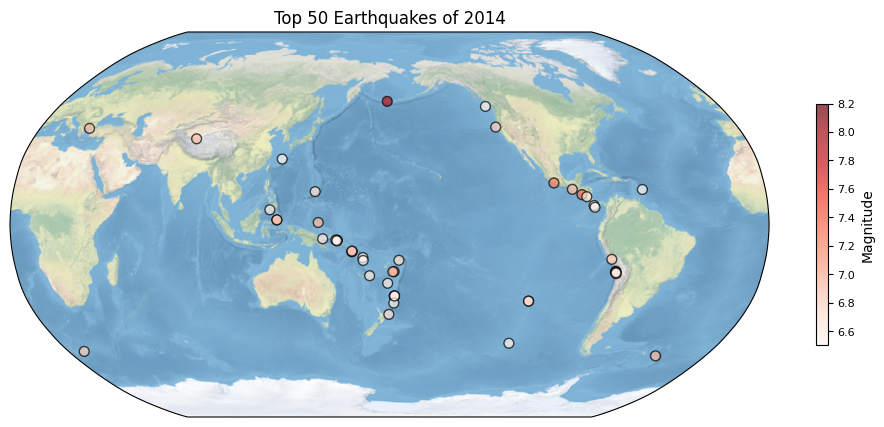

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

file_path = './usgs_earthquakes.csv' 
df = pd.read_csv(file_path)

# Filter out the top 50 earthquakes based on magnitude
top_50_earthquakes = df.nlargest(50, 'mag')

# Create and define the size of a figure object
plt.figure(figsize=(12, 5), dpi=100)

# 使用Robinson，并设置太平洋位于地图中央
proj = ccrs.Robinson(central_longitude=180)
ax = plt.axes(projection=proj)

# Add natural features
ax.stock_img() 

# Scatter plot the top 50 earthquake locations with specific colormap and size scaling
scatter = ax.scatter(
    top_50_earthquakes['longitude'],
    top_50_earthquakes['latitude'],
    c=top_50_earthquakes['mag'],
    cmap='Reds',
    s=50,
    alpha=0.7,
    transform=ccrs.PlateCarree(),
    edgecolor='k'
)

# Add colorbar for magnitude
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', fraction=0.013, pad=0.05)
cbar.set_label('Magnitude')
cbar.ax.tick_params(labelsize=8)

plt.title('Top 50 Earthquakes of 2014', fontsize=12)

plt.show()

## 2. Explore a netCDF dataset

DATASET:https://send.cra.moe/file/S6Kn9hSHvf6Uvxps/rljSfjo3Yte56vlf/PS4_2_DATASET.7z

### 2.1 [10 points] Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

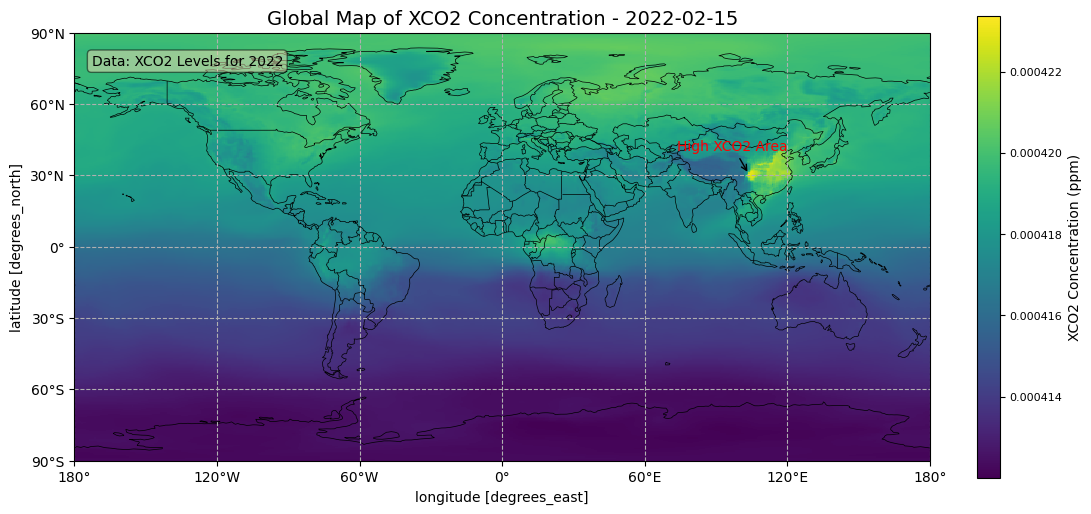

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import os

file_path = './PS4_2_DATASET'
file_list = [f for f in os.listdir(file_path) if f.endswith('.nc4')]

ds = xr.open_mfdataset([os.path.join(file_path, f) for f in file_list], combine='by_coords')

# 选择XCO2数据
XCO2_2022 = ds.XCO2.isel(time=-1)

# 确定XCO2浓度最高的位置
max_xco2 = XCO2_2022.max().values  # 计算最大值
max_location = np.unravel_index(np.argmax(XCO2_2022.values), XCO2_2022.shape)  # 获取最大值的位置
max_lon = float(XCO2_2022.lon[max_location[1]].values)
max_lat = float(XCO2_2022.lat[max_location[0]].values)

fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# 绘制XCO2数据
im = XCO2_2022.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', add_colorbar=False)

# 添加颜色条并设置标签
cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.03, pad=0.05)
cbar.set_label('XCO2 Concentration (ppm)', fontsize=10)
cbar.ax.tick_params(labelsize=8)

# 添加地理特征
features = [cfeature.BORDERS, cfeature.COASTLINE, cfeature.LAND, cfeature.OCEAN]
for feature in features:
    ax.add_feature(feature, linestyle='-', linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# 设置标题
ax.set_title('Global Map of XCO2 Concentration - 2022-02-15', fontsize=14)

# 设置X轴和Y轴标签及刻度
ax.set_xticks(np.arange(-180, 181, 60))
ax.set_yticks(np.arange(-90, 91, 30))
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

# 添加网格线
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, linestyle='--')
gl.top_labels = gl.right_labels = False
gl.left_labels = gl.bottom_labels = False

# 添加文本框
ax.text(0.02, 0.95, 'Data: XCO2 Levels for 2022', transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 添加标注
ax.annotate('High XCO2 Area', xy=(max_lon, max_lat), xytext=(max_lon - 30, max_lat + 10),
            arrowprops=dict(facecolor='red', arrowstyle='->'),
            fontsize=10, color='red')

# 显示图形
plt.show()


### 2.2 [10 points] Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

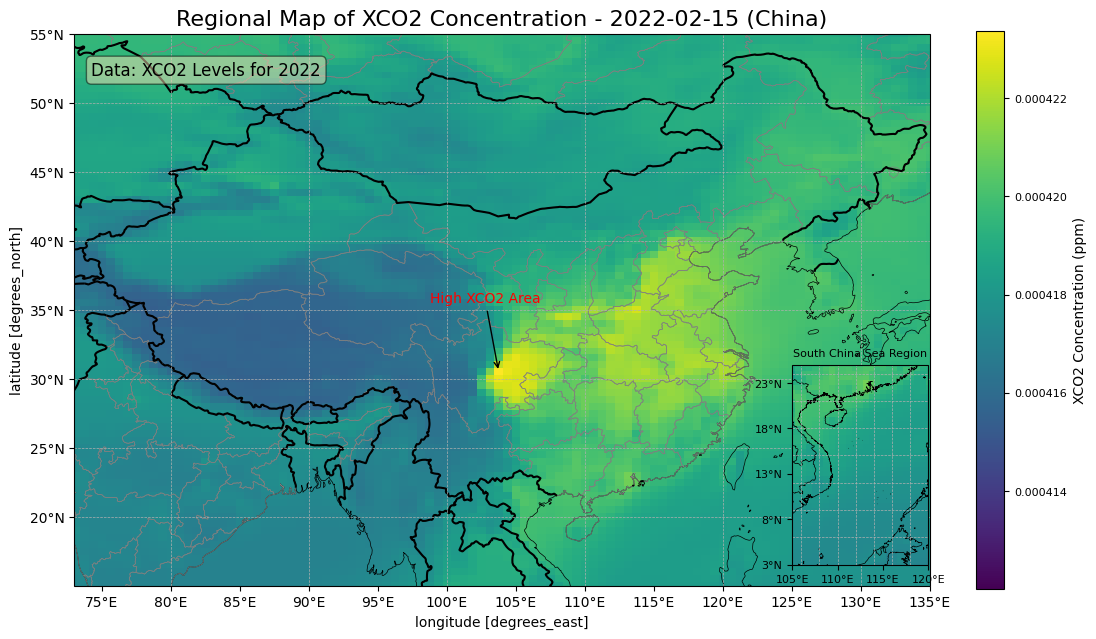

In [3]:
# 创建图形对象和地图投影（以中国为中心的局部地图）
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# 设置经纬度范围，集中显示中国区域
ax.set_extent([73, 135, 15, 55], crs=ccrs.PlateCarree())

# 绘制XCO2数据
im = XCO2_2022.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', add_colorbar=False)

# 添加颜色条并设置标签
cbar = plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.03, pad=0.05)
cbar.set_label('XCO2 Concentration (ppm)', fontsize=10)
cbar.ax.tick_params(labelsize=8)

# 添加地理特征
features = [cfeature.BORDERS, cfeature.COASTLINE, cfeature.LAND, cfeature.OCEAN]
for feature in features:
    ax.add_feature(feature, linestyle='-', linewidth=0.5, edgecolor='black')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.STATES, linestyle='-', linewidth=0.5, edgecolor='gray')  # 添加省份边界

# 加粗显示国家边界线
ax.add_feature(cfeature.BORDERS, linewidth=1.5, edgecolor='black')

# 设置标题
ax.set_title('Regional Map of XCO2 Concentration - 2022-02-15 (China)', fontsize=16)

# 设置X轴和Y轴标签及刻度
ax.set_xticks(np.arange(75, 136, 5))
ax.set_yticks(np.arange(20, 56, 5))
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

# 添加网格线
gl = ax.gridlines(draw_labels=True, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = gl.left_labels = gl.bottom_labels = False

# 添加文本框
ax.text(0.02, 0.95, 'Data: XCO2 Levels for 2022', transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))


# 添加标注，标注XCO2浓度最高的区域
max_xco2 = XCO2_2022.max().values  # 计算最大值
max_location = np.unravel_index(np.argmax(XCO2_2022.values), XCO2_2022.shape)  # 获取最大值的位置
max_lon = float(XCO2_2022.lon[max_location[1]].values)
max_lat = float(XCO2_2022.lat[max_location[0]].values)
ax.annotate('High XCO2 Area', xy=(max_lon, max_lat), xytext=(max_lon - 5, max_lat + 5),
            arrowprops=dict(facecolor='red', arrowstyle='->'),
            fontsize=10, color='red')

# 创建右下角的小地图（中国南海区域）
ax_inset = fig.add_axes([0.68, 0.24, 0.20, 0.20], projection=ccrs.PlateCarree())  # 位置和大小
ax_inset.set_extent([105, 120, 3, 25], crs=ccrs.PlateCarree())  # 南海区域经纬度范围

# 绘制XCO2数据（插图），使用与主图相同的颜色映射
im_inset = XCO2_2022.plot(ax=ax_inset, transform=ccrs.PlateCarree(), cmap='viridis', add_colorbar=False)

# 添加插图的地理特征
for feature in features:
    ax_inset.add_feature(feature, linestyle='-', linewidth=0.5, edgecolor='black')
ax_inset.add_feature(cfeature.LAND, facecolor='lightgray')
ax_inset.add_feature(cfeature.OCEAN, facecolor='lightblue')

# 设置标题
ax_inset.set_title('South China Sea Region', fontsize=8)

# 设置插图的坐标刻度
ax_inset.set_xticks(np.arange(105, 121, 5))
ax_inset.set_yticks(np.arange(3, 26, 5))
ax_inset.xaxis.set_major_formatter(LongitudeFormatter())
ax_inset.yaxis.set_major_formatter(LatitudeFormatter())

# 去掉小图的轴标题
ax_inset.set_xlabel('')
ax_inset.set_ylabel('')

# 调整刻度的大小
ax_inset.tick_params(labelsize=8)

# 在小图中添加网格线
gl_inset = ax_inset.gridlines(draw_labels=True, linestyle='--', linewidth=0.5)
gl_inset.top_labels = gl_inset.right_labels = gl_inset.left_labels = gl_inset.bottom_labels = False

# 显示图形
plt.show()